# Data Analysis/Data Visualization Report ( Bike Share Data Systems NYC for 1/2020 ) 
## by Saher Ramzy

## Investigation Overview

> In this investigation, I tring to explore the data from Citi Bike Trip NYC system. The main point for focusing was on biking duration, the time , and the Type of bikers .

## Dataset Overview

> This document explores the Ford citiBike's trip data for public containing bike rides from january 2020. The attributes included the trip start/end time, as well as additional measurements such as user type, gender, and age.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('master_file.csv')

In [4]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,starttime_DOW,starttime_hour,member_age,duration_min
0,789,2020-01-01 00:00:55.390,2020-01-01 00:14:05.147,504,1 Ave & E 16 St,40.732219,-73.981656,307,Canal St & Rutgers St,40.714275,-73.989900,30326,Subscriber,1992,Male,Wed,0,28,13.150000
1,1541,2020-01-01 00:01:08.102,2020-01-01 00:26:49.178,3423,West Drive & Prospect Park West,40.661063,-73.979453,3300,Prospect Park West & 8 St,40.665147,-73.976376,17105,Customer,1969,Male,Wed,0,51,25.683333
2,1464,2020-01-01 00:01:42.140,2020-01-01 00:26:07.011,3687,E 33 St & 1 Ave,40.743227,-73.974498,259,South St & Whitehall St,40.701221,-74.012342,40177,Subscriber,1963,Male,Wed,0,57,24.400000
3,592,2020-01-01 00:01:45.561,2020-01-01 00:11:38.155,346,Bank St & Hudson St,40.736529,-74.006180,490,8 Ave & W 33 St,40.751551,-73.993934,27690,Subscriber,1980,Male,Wed,0,40,9.866667
4,702,2020-01-01 00:01:45.788,2020-01-01 00:13:28.240,372,Franklin Ave & Myrtle Ave,40.694546,-73.958014,3637,Fulton St & Waverly Ave,40.683239,-73.965996,32583,Subscriber,1982,Male,Wed,0,38,11.700000


## Bike Ride Duration Time Visualization:

> The origianl duration data has right skew issue - bike durations range from less than 1 minute to 1400+ minutes with median at around 9 min and mean at around 12 min.

We have to do some data transformation to make data visualization easiler. Below are the plots before/after data transformation.

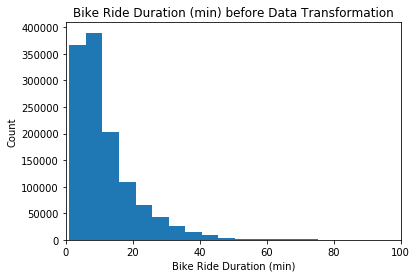

In [6]:

plt.hist(data = df, x = 'duration_min', bins = 20);
plt.xlim(0, 100);
plt.xlabel('Duration_m');
plt.ylabel("Count");
plt.title("Bike Ride Duration before Data Transformation");

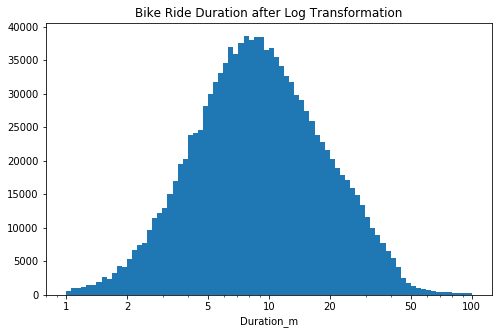

In [9]:
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5]);
plt.hist(data = df, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
plt.xlabel('Duration_m');
plt.ylabel('Count');
plt.title("Bike Ride Duration after Log Transformation");

## Daily Bike Ride Trends , Biker Type and Gender Visualization:

> Features investigated include the following: Start Time Hour,Member Gender, and User Type.¶

> Observations from below plots:
Thursday , 8:00 AM has the highest biker counts across All The Week
5:00 PM has the most male bikers compared to other hours. 8:00 AM and 5:00 PM have more female bikers compared to other hours.
5:00 PM has the most 'Subscriber' bikers compared to other hours. 3:00 pm has the most 'Customer' bikers compared to other hours
Thursday has the most male bikers compared to other days. when thursday and Friday have the most female bikers compared to other days.
Tuesday has the most 'Subscriber' bikers compared to other days. Sunday has the most 'Customer' bikers compared to other days.

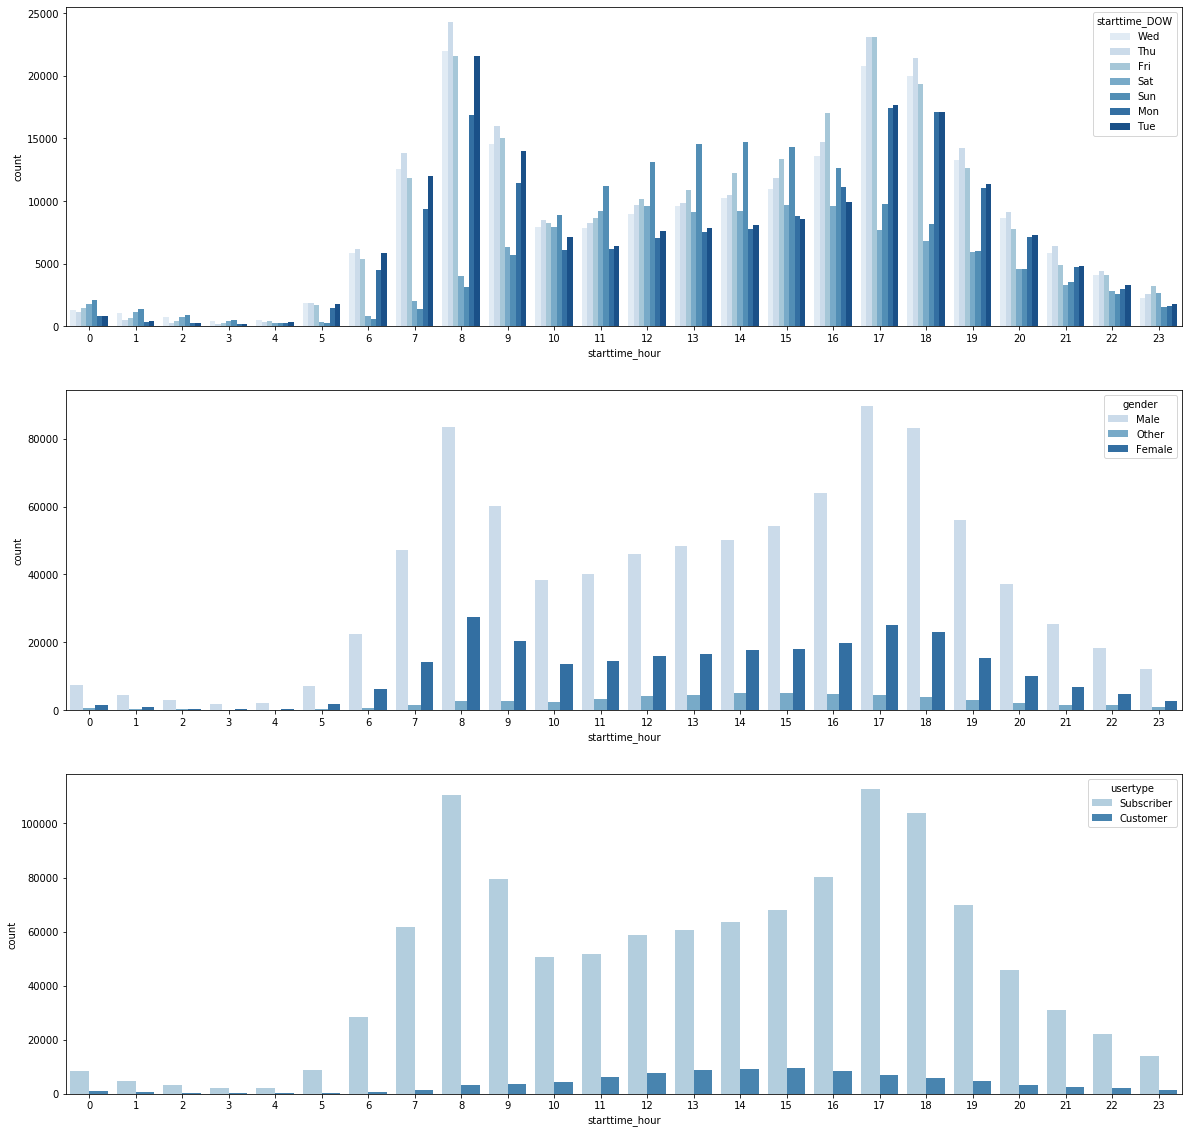

In [8]:
plt.figure(figsize = [20, 20]);

plt.subplot(3, 1, 1);
sb.countplot(data = df, x = 'starttime_hour', hue = 'starttime_DOW', palette = 'Blues');

ax = plt.subplot(3, 1, 2);
sb.countplot(data = df, x = 'starttime_hour', hue = 'gender', palette = 'Blues');

ax = plt.subplot(3, 1, 3);
sb.countplot(data = df, x = 'starttime_hour', hue = 'usertype', palette = 'Blues');

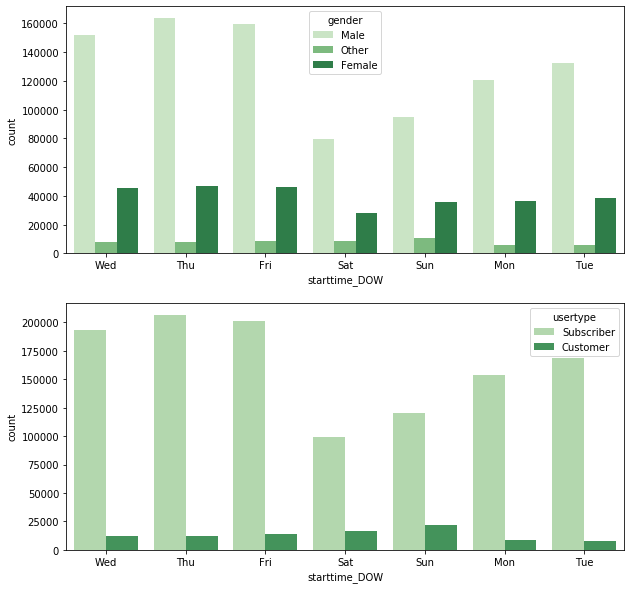

In [10]:
plt.figure(figsize = [10, 10]);

ax = plt.subplot(2, 1, 1);

sb.countplot(data = df, x = 'starttime_DOW', hue = 'gender', palette = 'Greens');

ax = plt.subplot(2, 1, 2);
sb.countplot(data = df, x = 'starttime_DOW', hue = 'usertype', palette = 'Greens');

plt.show()